# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [172]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [173]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [174]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [175]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [176]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [177]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Text preprocessing

In [178]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [179]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [180]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [181]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [182]:
# Combining all the preprocessing steps.
def preprocess_text_col(text_col):
    
    from tqdm import tqdm_notebook
    preprocessed_essays = []
    
    # tqdm is for printing the status bar
    for sentence in tqdm_notebook(text_col.values):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    
    return preprocessed_essays

## 1.5 Preparing data for models

In [183]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

### 1.5.1 Vectorizing Categorical data

In [184]:
# We use count vectorizer to convert the values into one.
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

def vect_cat_col(category):
    
    my_counter = Counter()
    for word in category.values:
        my_counter.update(word.split())

    cat_dict = dict(my_counter)
    sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

    return sorted_cat_dict

In [185]:
#Eliminate NaNs from teacher_prefix column, as they will cause errors when splitting words during preprocessing.
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('')

### 1.6.2 Vectorizing Text data

#### 1.6.2.1 Using Pretrained Models: Avg W2V

In [186]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
from tqdm import tqdm_notebook

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm_notebook(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [187]:
def apply_avgw2v(preprocessed_essays,preprocessed_titles,model):
    
    
    words = []
    for i in preprocessed_essays:
        words.extend(i.split(' '))

    for i in preprocessed_titles:
        words.extend(i.split(' '))
    print("all the words in the corpus", len(words))
    words = set(words)
    print("the unique words in the corpus", len(words))

    inter_words = set(model.keys()).intersection(words)
    print("The number of words that are present in both glove vectors and our coupus", \
          len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

    words_courpus = {}
    words_glove = set(model.keys())
    for i in words:
        if i in words_glove:
            words_courpus[i] = model[i]
    print("word 2 vec length", len(words_courpus))


    # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

    import pickle
    with open('glove_vectors', 'wb') as f:
        pickle.dump(words_courpus, f)


    # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
    # make sure you have the glove_vectors file

    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())

    # average Word2Vec
    # compute average essay word2vec for each review.
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    # average Word2Vec
    # compute average project title word2vec for each review.
    avg_w2v_titles_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_titles): # for each review/titles
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_titles_vectors.append(vector)
    return avg_w2v_vectors, avg_w2v_titles_vectors

#### 1.6.2.2 Using Pretrained Models: TFIDF weighted W2V

In [188]:
def apply_tfidfw2v(preprocessed_essays, preprocessed_titles):
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(preprocessed_essays)
    essays_vocab = tfidf_model.vocabulary_
    
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
        
    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted Word2Vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        
    #TFIDF-weighted Word2Vec for titles.
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(preprocessed_titles)
    titles_vocab = tfidf_model.vocabulary_
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())

    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted word2vec for each review.
    tfidf_w2v_titles_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_titles): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_titles_vectors.append(vector)
    return tfidf_w2v_vectors, tfidf_w2v_titles_vectors, essays_vocab, titles_vocab

In [189]:
def apply_tfidfw2v_vocab(preprocessed_essays, preprocessed_titles, essays_vocab, titles_vocab):
    tfidf_model = TfidfVectorizer(vocabulary = essays_vocab)
    tfidf_model.fit(preprocessed_essays)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
        
    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted Word2Vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        
    #TFIDF-weighted Word2Vec for titles.
    tfidf_model = TfidfVectorizer(vocabulary = titles_vocab)
    tfidf_model.fit(preprocessed_titles)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())

    # TFIDF-weighted Word2Vec
    # compute TFIDF-weighted word2vec for each review.
    tfidf_w2v_titles_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_titles): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_titles_vectors.append(vector)
    return tfidf_w2v_vectors, tfidf_w2v_titles_vectors

### 1.6.3 Vectorizing Numerical features

In [190]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [191]:
#Standardize price and number of previously posted projects.
from sklearn.preprocessing import StandardScaler

project_data['price'] = StandardScaler().fit_transform(project_data['price'].values.reshape(-1, 1))
project_data['teacher_number_of_previously_posted_projects'] = StandardScaler().fit_transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [192]:
y = project_data['project_is_approved']

#Split dataset by time to get test, CV, and train data.
#Source: https://stackoverflow.com/questions/39717090/scikit-learn-split-train-test-for-series
#Since the dataframe is already sorted by date, there is no need to sort by date again.

n = project_data.shape[0]
train_size = 0.8

n = project_data.shape[0]
train_size = 0.6
cv_size = 0.2

train_data = project_data.iloc[:int(n * train_size)]
cv_data = project_data.iloc[int(n * (train_size)):int(n * (train_size + cv_size))]
test_data = project_data.iloc[int(n * (train_size + cv_size)):]
y_train = y.iloc[:int(n * train_size)]
y_cv = y.iloc[int(n * (train_size)):int(n * (train_size + cv_size))]
y_test = y.iloc[int(n * (train_size + cv_size)):]

print(train_data.shape)
print(cv_data.shape)
print(test_data.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(65548, 20)
(21850, 20)
(21850, 20)
(65548,)
(21850,)
(21850,)


<h2>2.2 Make Data Model Ready: preprocess essays</h2>

In [193]:
#Train Data
preprocessed_essays_train=preprocess_text_col(train_data['essay'])

#CV data
preprocessed_essays_cv=preprocess_text_col(cv_data['essay'])
    
#Test Data
preprocessed_essays_test=preprocess_text_col(test_data['essay'])

<h2>2.3 Make Data Model Ready: preprocess titles</h2>

In [194]:
#Train Data
preprocessed_titles_train=preprocess_text_col(train_data['project_title'])

#CV Data
preprocessed_titles_cv=preprocess_text_col(cv_data['project_title'])
    
#Test Data
preprocessed_titles_test=preprocess_text_col(test_data['project_title'])

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h3>2.4.1 Bag Of Words</h3>

In [195]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.

vectorizer = CountVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)

vectorizer_titles = CountVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [196]:
#Preprocessing CV data.
categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

prev_projects_norm = cv_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = cv_data['price'].values.reshape(-1,1)

essays = vectorizer.transform(preprocessed_essays_cv)
titles = vectorizer_titles.transform(preprocessed_titles_cv)

x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [197]:
#Preprocessing test data.
categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

prev_projects_norm = test_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = test_data['price'].values.reshape(-1,1)

essays = vectorizer.transform(preprocessed_essays_test)
titles = vectorizer_titles.transform(preprocessed_titles_test)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [198]:
#Create a list of the feature names.
x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))
feature_names = []
feature_names.extend(vectorizer_categories.get_feature_names())
feature_names.extend(vectorizer_sub_categories.get_feature_names())
feature_names.extend(vectorizer_state.get_feature_names())
feature_names.extend(vectorizer_grade.get_feature_names())
feature_names.extend(vectorizer_prefix.get_feature_names())
feature_names.append("Std. Previous Projects")
feature_names.append("Std. Price")
feature_names.extend(vectorizer_titles.get_feature_names())
feature_names.extend(vectorizer.get_feature_names())

In [199]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

In [200]:
#Create and apply linear SVM.
#Find hyperparameter with highest AUC.
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm_notebook
import math

#Create function to perform hyperparameter tuning with CV validation and plot.
def plot_grid_search():
    min_samples = [5, 10, 100, 500]
    depth = [1, 5, 10, 50, 100, 500, 1000]
    cv_scores=[]
    
    for samples in min_samples:
        for d in depth:
            clf = tree.DecisionTreeClassifier(max_depth = d, min_samples_split = samples)
            clf.fit(x_train_re,y_train_re)
            y_cv_pred = clf.predict_proba(x_cv)[:,1]
            cv_scores.append(roc_auc_score(y_cv, y_cv_pred))

    #Source: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
    #Reshape array to have alphas in a row and l1_ratios in a column.

    cv_scores = np.array(cv_scores).reshape(len(min_samples),len(depth))
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line).
    for idx, val in enumerate(min_samples):
        ax.plot(depth, cv_scores[idx,:], '-o', label= 'Min. Samples' + ': ' + str(val))
        ax.set_title("Hyperparameters Vs. AUC", fontsize=20, fontweight='bold')
        ax.set_xlabel("Depth", fontsize=16)
        ax.set_ylabel('AUC', fontsize=16)
        ax.legend(loc=(1,0), fontsize=12)
        ax.grid(True)

    best_cv_score = np.argmax(cv_scores)
    best_min_samples = min_samples[best_cv_score//6]
    best_depth = depth[best_cv_score%6]

    print("The best minimum number of samples is {} and the best depth is {} with an AUC of {}.".format(best_min_samples, best_depth, cv_scores[(best_cv_score//6), (best_cv_score%6)]))
    return(best_min_samples, best_depth)

The best minimum number of samples is 500 and the best depth is 500 with an AUC of 0.6402532826977456.


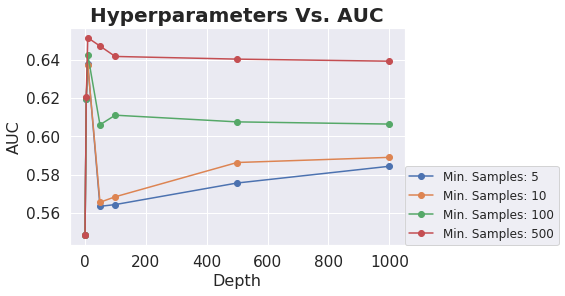

In [201]:
#Perform hyperparameter tuning and plot.
best_samples_bow, best_depth_bow = plot_grid_search()

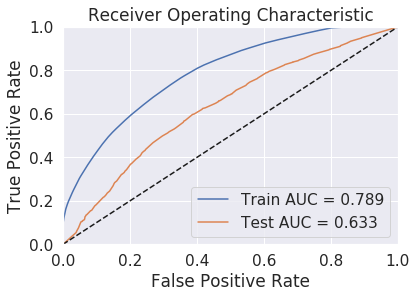

In [202]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_train_csr = x_train_re.tocsr()
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

clf = tree.DecisionTreeClassifier(max_depth = best_depth_bow, min_samples_split = best_samples_bow)
clf.fit(x_train_re, y_train_re)
y_train_pred = clf.predict_proba(x_train_re)[:,1]
y_test_pred = clf.predict_proba(x_test)[:,1]

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_bow_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_bow_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_bow_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_bow_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

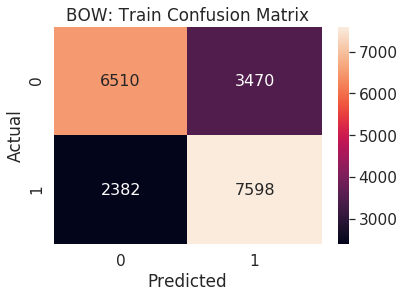

In [203]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('BOW: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

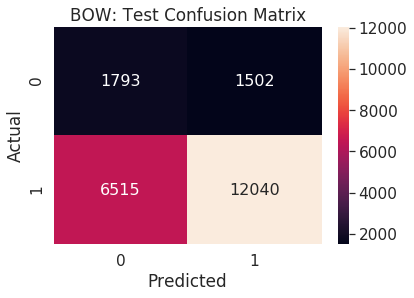

In [204]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('BOW: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### 2.4.1.1 Graphviz Visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

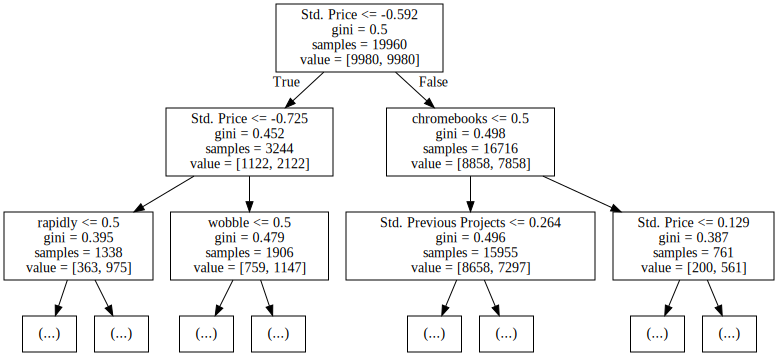

In [205]:
#Visualize decision tree.
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 2, feature_names = feature_names)
graph = graphviz.Source(dot_data) 
graph

#### 2.4.1.2 False Positive Visualization, <font color='red'> SET 1</font>

In [206]:
#Get all false positives from test data set.
#Source: https://stackoverflow.com/questions/51878608/how-to-view-the-rows-marked-as-false-positive-and-false-negative-from-confusion

#Converting test data to CSR so they are iterable.
x_test = x_test.tocsr()
#converting Pandas to Numpy array for creating boolean mask.
y_test_array = y_test.as_matrix(columns=None)

#Create boolean mask and use it to filter for false positives.
false_positive_prices = test_data['price'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_previous = test_data['teacher_number_of_previously_posted_projects'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_titles = test_data['project_title'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_essays = test_data['essay'][(y_test_array < 0.5) & (y_test_pred >= .5)]

#Preprocess text data.
false_positive_titles = preprocess_text_col(false_positive_titles)
false_positive_essays = preprocess_text_col(false_positive_essays)

Here are the most common words used in titles for false positives.


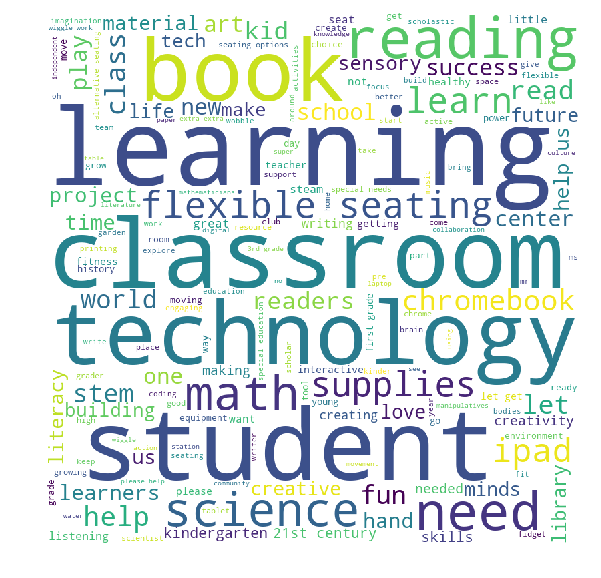

In [207]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_titles for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in titles for false positives.")
plt.show()

Here are the most common words used in essays for false positives.


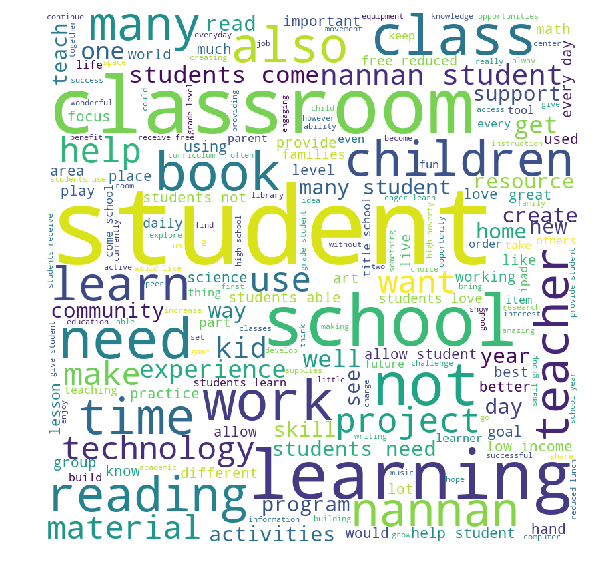

In [208]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays for false positives.")
plt.show()

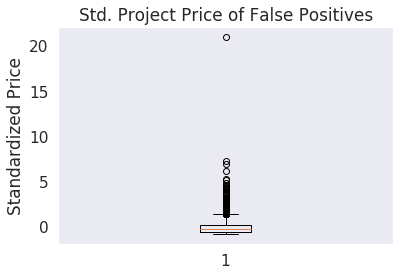

In [209]:
#Source: https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot(false_positive_prices)
plt.title('Std. Project Price of False Positives')
plt.ylabel('Standardized Price')
plt.grid()
plt.show()

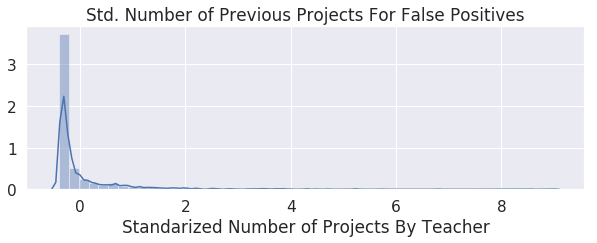

In [210]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_previous)
plt.title("Std. Number of Previous Projects For False Positives")
plt.xlabel('Standarized Number of Projects By Teacher')
plt.show()

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [211]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.
vectorizer = TfidfVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)
vectorizer_titles = TfidfVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [212]:
#Preprocessing CV data.

prev_projects_norm = cv_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = cv_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

essays = vectorizer.transform(preprocessed_essays_cv)
titles = vectorizer_titles.transform(preprocessed_titles_cv)

x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [213]:
#Preprocessing test data.

prev_projects_norm = test_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = test_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

essays = vectorizer.transform(preprocessed_essays_test)
titles = vectorizer_titles.transform(preprocessed_titles_test)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [214]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
rus = RandomUnderSampler(random_state=0)

#Reset y_train to what it was before balancing for prior models.
x_train_re, y_train_re = rus.fit_resample(x_train, y_train)
print(x_train.shape)
print(y_train.shape)
print(x_train_re.shape)
print(y_train_re.shape)

(65548, 16180)
(65548,)
(19960, 16180)
(19960,)


The best minimum number of samples is 500 and the best depth is 500 with an AUC of 0.6378356018887688.


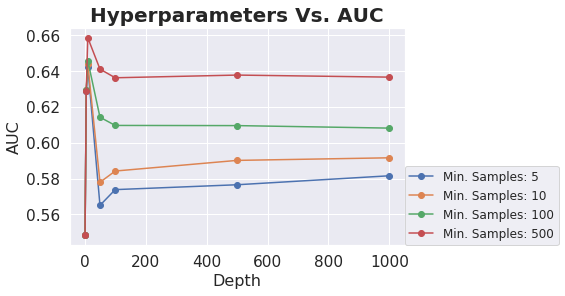

In [215]:
#Perform parameter tuning and plot.
best_samples_tfidf, best_depth_tfidf = plot_grid_search()

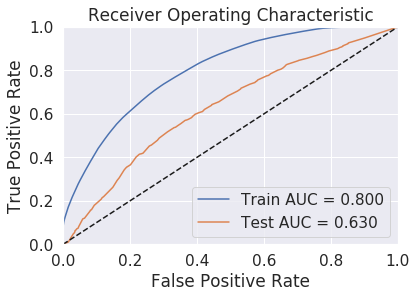

In [216]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_train_csr = x_train_re.tocsr()
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

clf = tree.DecisionTreeClassifier(max_depth = best_depth_tfidf, min_samples_split = best_samples_tfidf)
clf.fit(x_train_re, y_train_re)
y_train_pred = clf.predict_proba(x_train_re)[:,1]
y_test_pred = clf.predict_proba(x_test)[:,1]

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_tfidf_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_tfidf_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_tfidf_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_tfidf_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

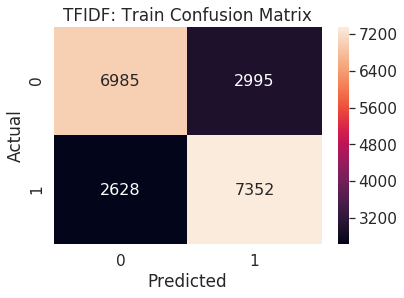

In [217]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

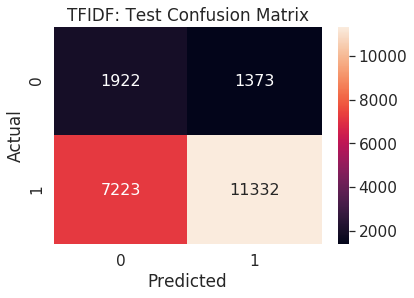

In [218]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

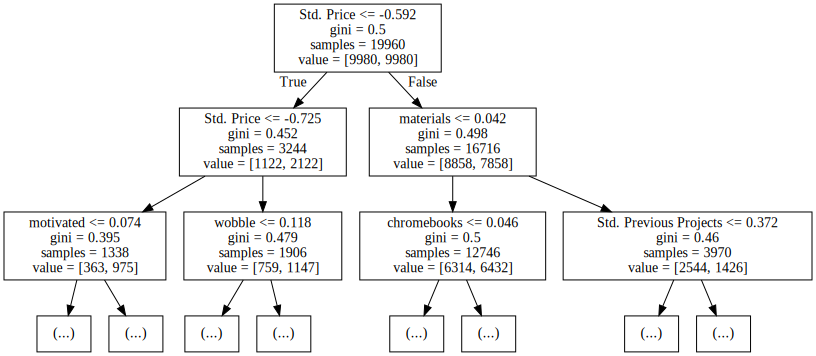

In [219]:
#Visualize decision tree.
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 2, feature_names = feature_names)
graph = graphviz.Source(dot_data) 
graph

#### 2.4.1.2 False Positive Visualization, <font color='red'> SET 2</font>

In [220]:
#Get all false positives from test data set.
#Source: https://stackoverflow.com/questions/51878608/how-to-view-the-rows-marked-as-false-positive-and-false-negative-from-confusion

#Converting test data to CSR so they are iterable.
x_test = x_test.tocsr()
#converting Pandas to Numpy array for creating boolean mask.
y_test_array = y_test.as_matrix(columns=None)

#Create boolean mask and use it to filter for false positives.
false_positive_prices = test_data['price'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_previous = test_data['teacher_number_of_previously_posted_projects'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_titles = test_data['project_title'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_essays = test_data['essay'][(y_test_array < 0.5) & (y_test_pred >= .5)]

#Preprocess text data.
false_positive_titles = preprocess_text_col(false_positive_titles)
false_positive_essays = preprocess_text_col(false_positive_essays)

Here are the most common words used in titles for false positives.


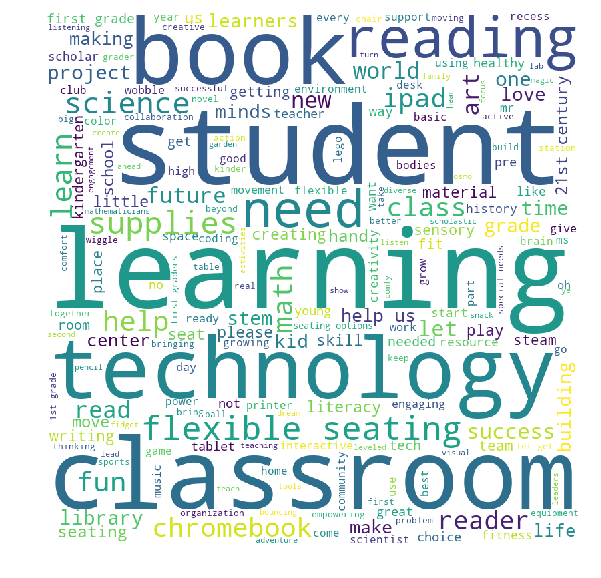

In [221]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_titles for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in titles for false positives.")
plt.show()

Here are the most common words used in essays for false positives.


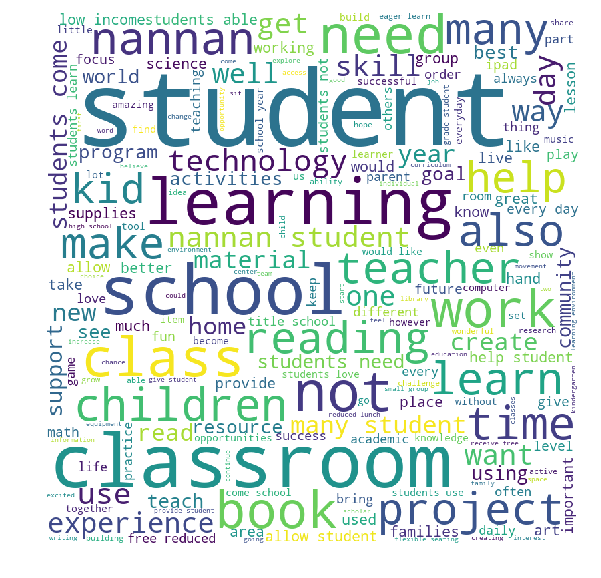

In [222]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays for false positives.")
plt.show()

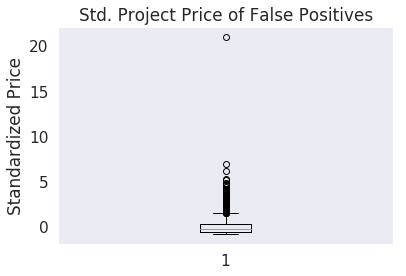

In [223]:
#Source: https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot(false_positive_prices)
plt.title('Std. Project Price of False Positives')
plt.ylabel('Standardized Price')
plt.grid()
plt.show()

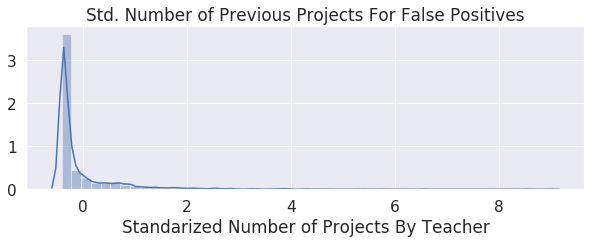

In [224]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_previous)
plt.title("Std. Number of Previous Projects For False Positives")
plt.xlabel('Standarized Number of Projects By Teacher')
plt.show()

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [261]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.

model = loadGloveModel('glove.42B.300d.txt')
essays, titles = apply_avgw2v(preprocessed_essays_train,preprocessed_titles_train,model)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

Loading Glove Model



Done. 1917495  words loaded!
all the words in the corpus 10205801
the unique words in the corpus 47977
The number of words that are present in both glove vectors and our coupus 43101 ( 89.837 %)
word 2 vec length 43101


100%|██████████| 65548/65548 [00:01<00:00, 49309.82it/s]


In [262]:
#Preprocessing CV data.

prev_projects_norm = cv_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = cv_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

essays, titles = apply_avgw2v(preprocessed_essays_cv,preprocessed_titles_cv, model)

x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

all the words in the corpus 3407843
the unique words in the corpus 31362
The number of words that are present in both glove vectors and our coupus 29590 ( 94.35 %)
word 2 vec length 29590


100%|██████████| 21850/21850 [00:00<00:00, 36606.31it/s]


In [263]:
#Preprocessing test data.

prev_projects_norm = test_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = test_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

essays, titles = apply_avgw2v(preprocessed_essays_test,preprocessed_titles_test, model)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

all the words in the corpus 3400769
the unique words in the corpus 31427
The number of words that are present in both glove vectors and our coupus 29607 ( 94.209 %)
word 2 vec length 29607


100%|██████████| 21850/21850 [00:00<00:00, 45005.10it/s]


In [264]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

The best minimum number of samples is 500 and the best depth is 100 with an AUC of 0.6205860203037487.


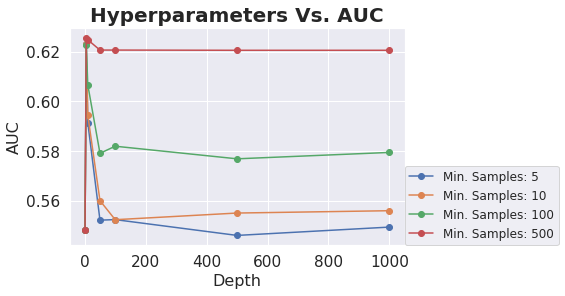

In [229]:
#Perform hyperparamater tuning and plot.
best_samples_avgw2v, best_depth_avgw2v = plot_grid_search()

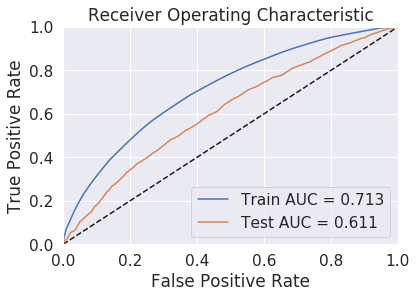

In [265]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_train_csr = x_train_re.tocsr()
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

clf = tree.DecisionTreeClassifier(max_depth = best_depth_avgw2v, min_samples_split = best_samples_avgw2v)
clf.fit(x_train_re, y_train_re)
y_train_pred = clf.predict_proba(x_train_re)[:,1]
y_test_pred = clf.predict_proba(x_test)[:,1]

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_avgw2v_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_avgw2v_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_avgw2v_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_avgw2v_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

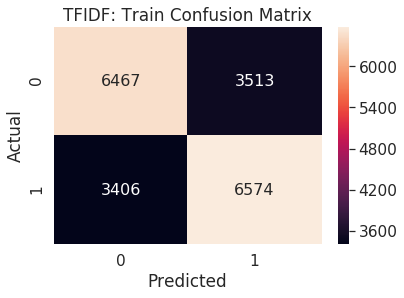

In [231]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

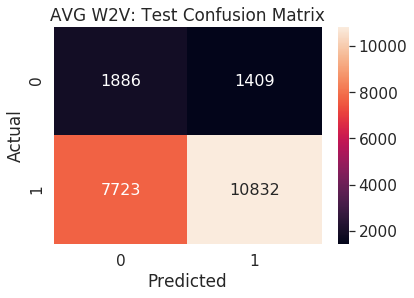

In [232]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('AVG W2V: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### 2.4.3.1 False Positive Visualization,<font color='red'> SET 3</font>

In [266]:
#Get all false positives from test data set.
#Source: https://stackoverflow.com/questions/51878608/how-to-view-the-rows-marked-as-false-positive-and-false-negative-from-confusion

#Converting test data to CSR so they are iterable.
x_test = x_test.tocsr()
#converting Pandas to Numpy array for creating boolean mask.
y_test_array = y_test.as_matrix(columns=None)

#Create boolean mask and use it to filter for false positives.
false_positive_prices = test_data['price'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_previous = test_data['teacher_number_of_previously_posted_projects'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_titles = test_data['project_title'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_essays = test_data['essay'][(y_test_array < 0.5) & (y_test_pred >= .5)]

#Preprocess text data.
false_positive_titles = preprocess_text_col(false_positive_titles)
false_positive_essays = preprocess_text_col(false_positive_essays)

Here are the most common words used in titles for false positives.


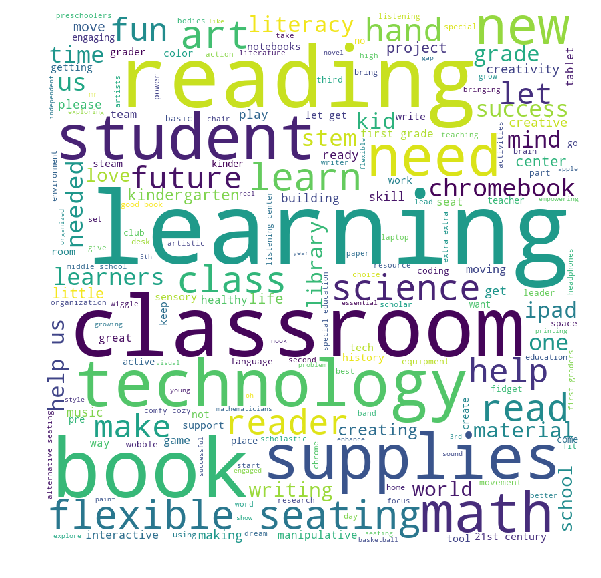

In [267]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_titles for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in titles for false positives.")
plt.show()

Here are the most common words used in essays for false positives.


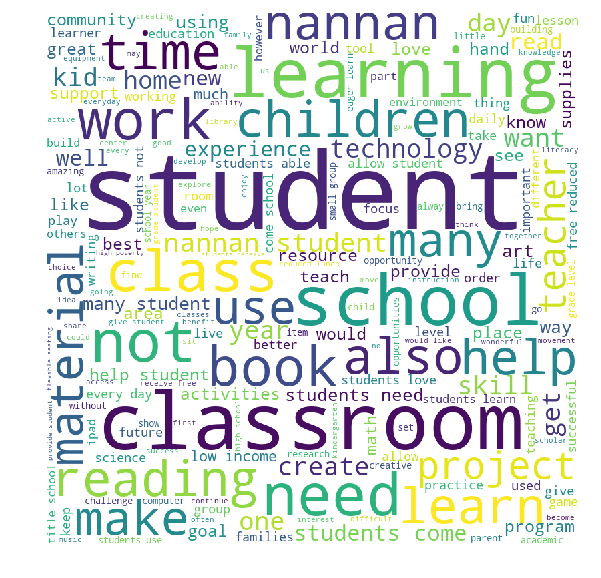

In [268]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays for false positives.")
plt.show()

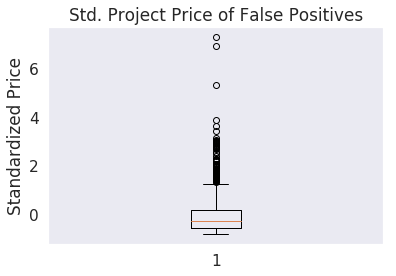

In [269]:
plt.boxplot(false_positive_prices)
plt.title('Std. Project Price of False Positives')
plt.ylabel('Standardized Price')
plt.grid()
plt.show()

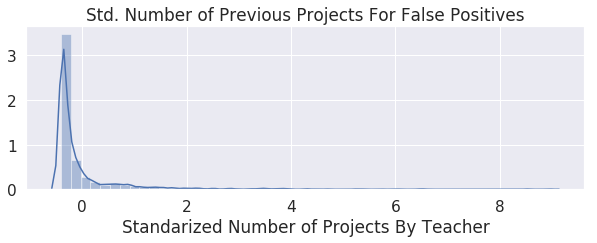

In [270]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_previous)
plt.title("Std. Number of Previous Projects For False Positives")
plt.xlabel('Standarized Number of Projects By Teacher')
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [271]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.

essays, titles, essays_vocab, titles_vocab = apply_tfidfw2v(preprocessed_essays_train,preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

100%|██████████| 65548/65548 [00:03<00:00, 21650.84it/s]


In [272]:
#Preprocessing CV data.

prev_projects_norm = cv_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = cv_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

essays, titles = apply_tfidfw2v_vocab(preprocessed_essays_cv, preprocessed_titles_cv, essays_vocab, titles_vocab)

x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

100%|██████████| 21850/21850 [00:00<00:00, 22077.00it/s]


In [273]:
#Preprocessing test data.

prev_projects_norm = test_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = test_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

essays, titles = apply_tfidfw2v_vocab(preprocessed_essays_test, preprocessed_titles_test, essays_vocab, titles_vocab)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

100%|██████████| 21850/21850 [00:00<00:00, 22760.24it/s]


In [274]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re, y_train_re = rus.fit_resample(x_train, y_train)

The best minimum number of samples is 500 and the best depth is 100 with an AUC of 0.6196889126277179.


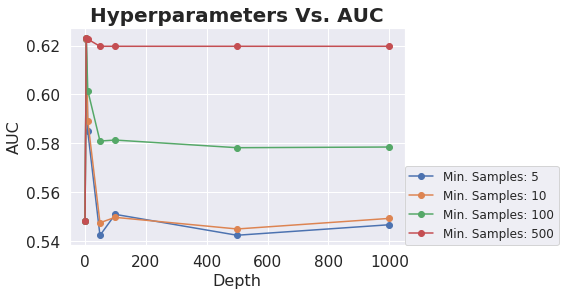

In [237]:
#Perform hyperparameter tuning and plot.
best_samples_tfidfw2v, best_depth_tfidfw2v = plot_grid_search()

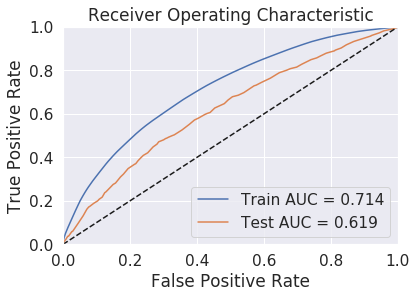

In [275]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
x_train_csr = x_train_re.tocsr()
x_test_csr = x_test.tocsr()
y_test_pred = []
y_train_pred =[]

clf = tree.DecisionTreeClassifier(max_depth = best_depth_tfidfw2v, min_samples_split = best_samples_tfidfw2v)
clf.fit(x_train_re, y_train_re)
y_train_pred = clf.predict_proba(x_train_re)[:,1]
y_test_pred = clf.predict_proba(x_test)[:,1]

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_tfidfw2v_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_tfidfw2v_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_tfidfw2v_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_tfidfw2v_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

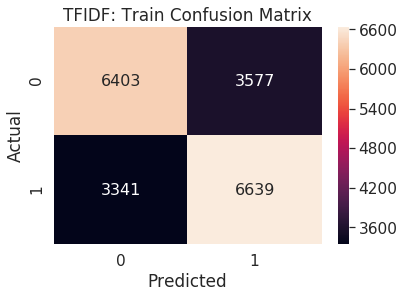

In [239]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF: Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

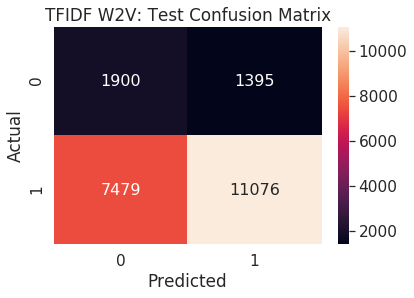

In [240]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF W2V: Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### 2.4.4.1 False Positive Visualization,<font color='red'> SET 4</font>

In [276]:
#Get all false positives from test data set.
#Source: https://stackoverflow.com/questions/51878608/how-to-view-the-rows-marked-as-false-positive-and-false-negative-from-confusion

#Converting test data to CSR so they are iterable.
x_test = x_test.tocsr()
#converting Pandas to Numpy array for creating boolean mask.
y_test_array = y_test.as_matrix(columns=None)

#Create boolean mask and use it to filter for false positives.
false_positive_prices = test_data['price'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_previous = test_data['teacher_number_of_previously_posted_projects'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_titles = test_data['project_title'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_essays = test_data['essay'][(y_test_array < 0.5) & (y_test_pred >= .5)]

#Preprocess text data.
false_positive_titles = preprocess_text_col(false_positive_titles)
false_positive_essays = preprocess_text_col(false_positive_essays)

Here are the most common words used in titles for false positives.


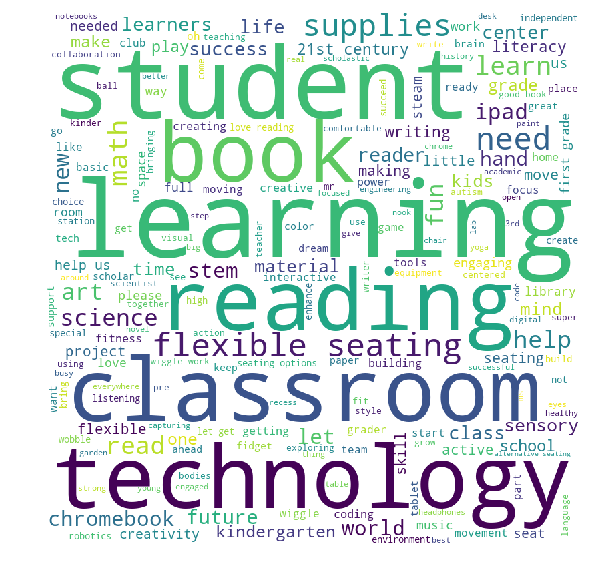

In [277]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_titles for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in titles for false positives.")
plt.show()

Here are the most common words used in essays for false positives.


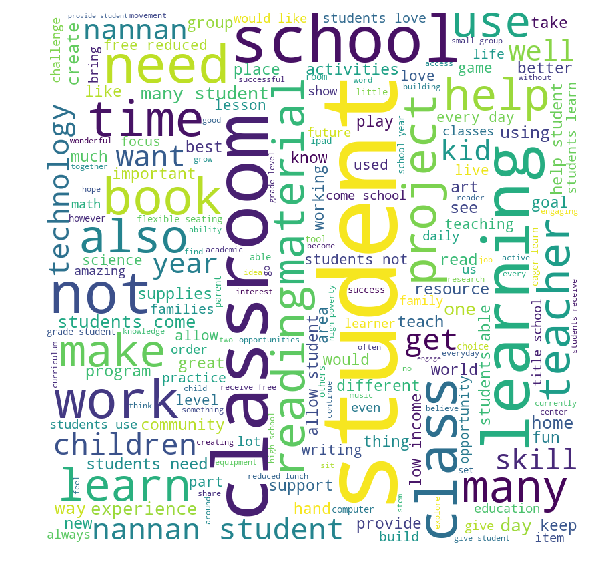

In [278]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays for false positives.")
plt.show()

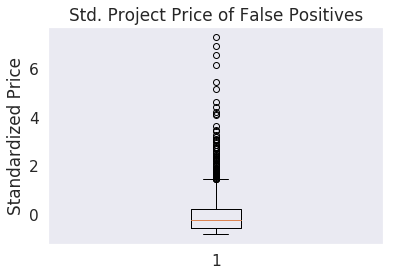

In [279]:
#Source: https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot(false_positive_prices)
plt.title('Std. Project Price of False Positives')
plt.ylabel('Standardized Price')
plt.grid()
plt.show()

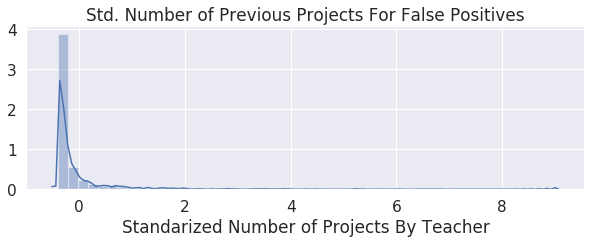

In [280]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_previous)
plt.title("Std. Number of Previous Projects For False Positives")
plt.xlabel('Standarized Number of Projects By Teacher')
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [241]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.
vectorizer = TfidfVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)
vectorizer_titles = TfidfVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [242]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
x_train_re, y_train_re = rus.fit_resample(x_train, y_train)
print(x_train.shape)
print(y_train.shape)
print(x_train_re.shape)
print(y_train_re.shape)

(65548, 16180)
(65548,)
(19960, 16180)
(19960,)


In [243]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python
clf = tree.DecisionTreeClassifier(max_depth = best_depth_tfidf, min_samples_split = best_samples_tfidf)
clf = clf.fit(x_train_re, y_train_re)
feature_imp = clf.feature_importances_
idx = np.argsort(feature_imp)[-500:]

print(feature_imp)

[0. 0. 0. ... 0. 0. 0.]


In [244]:
#Preprocessing train data.
from scipy.sparse import hstack

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.
vectorizer_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_categories']).keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values)

vectorizer_sub_categories = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['clean_subcategories']).keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values)

vectorizer_state = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['school_state']).keys()), lowercase=False, binary=True)
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values)

vectorizer_grade = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['project_grade_category']).keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values)

vectorizer_prefix = CountVectorizer(min_df=10, vocabulary=list(vect_cat_col(train_data['teacher_prefix']).keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values)

#Text data.
vectorizer = TfidfVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)
vectorizer_titles = TfidfVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

#Convert x_train to CSR to slice by idx (column index of top features).
#This keeps the 500 features with highest importance.
x_train = x_train.tocsr()[:,idx]

In [245]:
#Preprocessing CV data.

prev_projects_norm = cv_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = cv_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(cv_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(cv_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(cv_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(cv_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(cv_data['teacher_prefix'].values)

essays = vectorizer.transform(preprocessed_essays_cv)
titles = vectorizer_titles.transform(preprocessed_titles_cv)

x_cv = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))
x_cv = x_cv.tocsr()[:,idx]

In [246]:
#Preprocessing test data.

prev_projects_norm = test_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = test_data['price'].values.reshape(-1,1)

categories_one_hot = vectorizer_categories.transform(test_data['clean_categories'].values)
sub_categories_one_hot = vectorizer_sub_categories.transform(test_data['clean_subcategories'].values)
state_one_hot = vectorizer_state.transform(test_data['school_state'].values)
grade_one_hot = vectorizer_grade.transform(test_data['project_grade_category'].values)
prefix_one_hot = vectorizer_prefix.transform(test_data['teacher_prefix'].values)

essays = vectorizer.transform(preprocessed_essays_test)
titles = vectorizer_titles.transform(preprocessed_titles_test)

x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))
x_test = x_test.tocsr()[:,idx]

In [247]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
x_train_re, y_train_re = rus.fit_resample(x_train, y_train)
print(x_train.shape)
print(y_train.shape)
print(x_train_re.shape)
print(y_train_re.shape)

(65548, 500)
(65548,)
(19960, 500)
(19960,)


The best minimum number of samples is 500 and the best depth is 500 with an AUC of 0.6390721557124868.


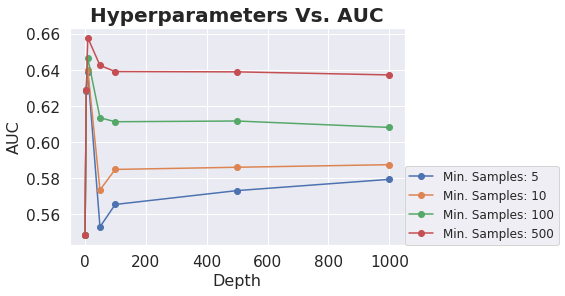

In [248]:
#Perform parameter tuning and plot.
best_samples_tfidf500, best_depth_tfidf500 = plot_grid_search()

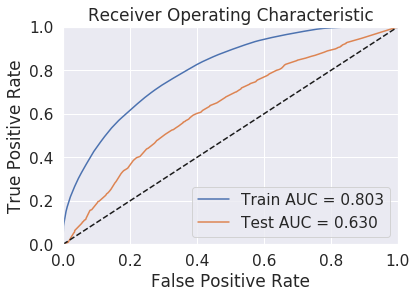

In [249]:
#Source: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python

clf = tree.DecisionTreeClassifier(max_depth = best_depth_tfidf500, min_samples_split = best_samples_tfidf500)
clf.fit(x_train_re, y_train_re)
y_train_pred = clf.predict_proba(x_train_re)[:,1]
y_test_pred = clf.predict_proba(x_test)[:,1]

# Compute fpr, tpr, thresholds and roc auc train
fpr, tpr, thresholds = roc_curve(y_train_re, y_train_pred)
roc_auc_tfidf500_train = roc_auc_score(y_train_re, y_train_pred)

# Compute fpr, tpr, thresholds and roc auc test
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_tfidf500_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='Train AUC = %0.3f' % roc_auc_tfidf500_train)
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.3f' % roc_auc_tfidf500_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Text(25.5, 0.5, 'Actual')

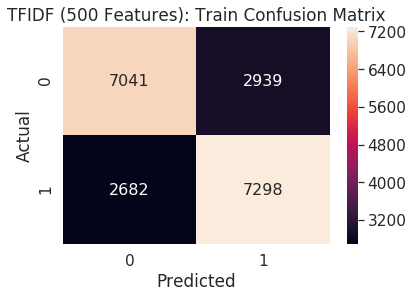

In [250]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_train_pred = ['%.0f' % elem for elem in y_train_pred]
formatted_y_train = ['%.0f' % elem for elem in y_train_re]

conf_matrix = confusion_matrix(formatted_y_train, formatted_y_train_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF (500 Features): Train Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(25.5, 0.5, 'Actual')

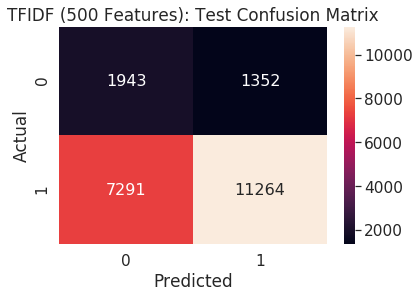

In [251]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix
import seaborn

#Source: https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places
formatted_y_test_pred = ['%.0f' % elem for elem in y_test_pred ]
formatted_y_test = ['%.0f' % elem for elem in y_test]

conf_matrix = confusion_matrix(formatted_y_test, formatted_y_test_pred)
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title('TFIDF (500 Features): Test Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [252]:
#Create a list of the feature names.
x_test = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))
feature_names = []
feature_names.extend(vectorizer_categories.get_feature_names())
feature_names.extend(vectorizer_sub_categories.get_feature_names())
feature_names.extend(vectorizer_state.get_feature_names())
feature_names.extend(vectorizer_grade.get_feature_names())
feature_names.extend(vectorizer_prefix.get_feature_names())
feature_names.append("Std. Previous Projects")
feature_names.append("Std. Price")
feature_names.extend(vectorizer_titles.get_feature_names())
feature_names.extend(vectorizer.get_feature_names())

#Slice to top 500 features.
feature_names = [feature_names[i] for i in idx]

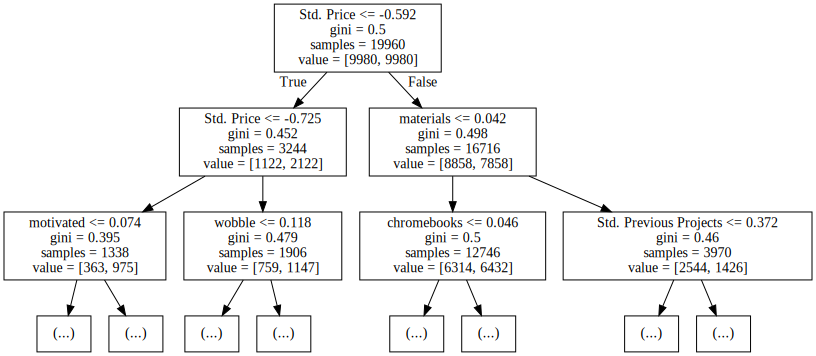

In [253]:
#Visualize decision tree.
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 2, feature_names = feature_names)
graph = graphviz.Source(dot_data) 
graph

#### 2.4.1.2 False Positive Visualization, <font color='red'> SET 5</font>

In [254]:
#Get all false positives from test data set.
#Source: https://stackoverflow.com/questions/51878608/how-to-view-the-rows-marked-as-false-positive-and-false-negative-from-confusion

#Converting test data to CSR so they are iterable.
x_test = x_test.tocsr()
#converting Pandas to Numpy array for creating boolean mask.
y_test_array = y_test.as_matrix(columns=None)

#Create boolean mask and use it to filter for false positives.
false_positive_prices = test_data['price'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_previous = test_data['teacher_number_of_previously_posted_projects'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_titles = test_data['project_title'][(y_test_array < 0.5) & (y_test_pred >= .5)]
false_positive_essays = test_data['essay'][(y_test_array < 0.5) & (y_test_pred >= .5)]

#Preprocess text data.
false_positive_titles = preprocess_text_col(false_positive_titles)
false_positive_essays = preprocess_text_col(false_positive_essays)

Here are the most common words used in titles for false positives.


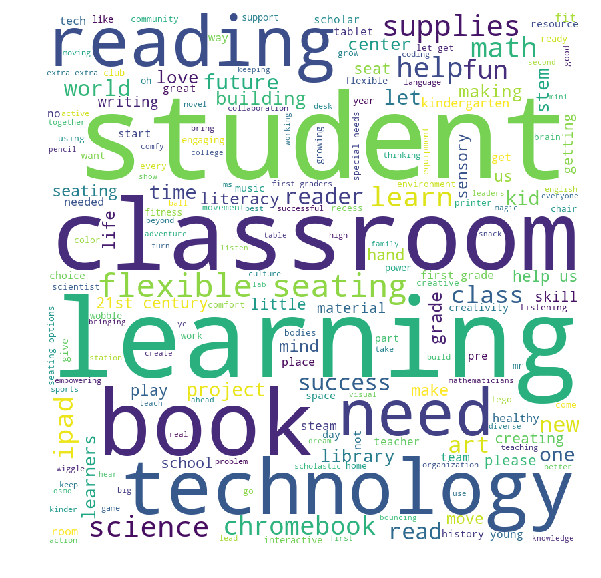

In [255]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_titles for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in titles for false positives.")
plt.show()

Here are the most common words used in essays for false positives.


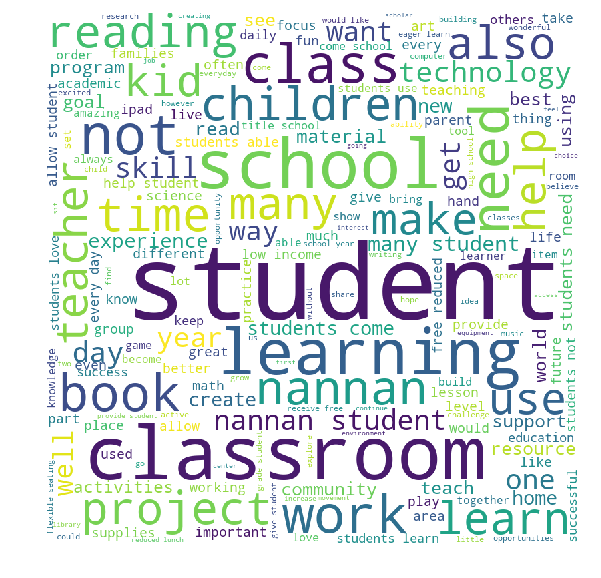

In [256]:
# Python program to generate WordCloud for essays of false positives.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in false_positive_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays for false positives.")
plt.show()

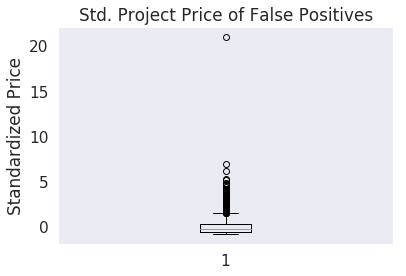

In [257]:
#Source: https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot(false_positive_prices)
plt.title('Std. Project Price of False Positives')
plt.ylabel('Standardized Price')
plt.grid()
plt.show()

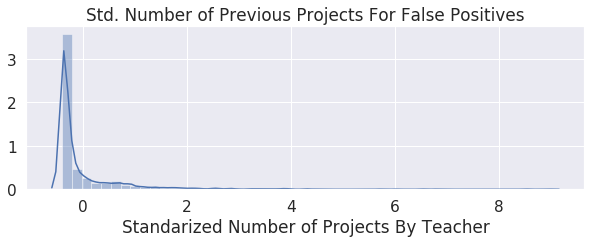

In [258]:
plt.figure(figsize=(10,3))
sns.distplot(false_positive_previous)
plt.title("Std. Number of Previous Projects For False Positives")
plt.xlabel('Standarized Number of Projects By Teacher')
plt.show()

<h1>3. Conclusion</h1>

In [260]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Min Samples", "Max Depth", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Decision Tree", best_samples_bow, best_depth_bow, '%0.2f' % roc_auc_bow_train, '%0.2f' % roc_auc_bow_test])
x.add_row(["TFIDF", "Decision Tree", best_samples_tfidf, best_depth_tfidf, '%0.2f' % roc_auc_tfidf_train, '%0.2f' % roc_auc_tfidf_test])
x.add_row(["AVG W2V", "Decision Tree", best_samples_avgw2v, best_depth_avgw2v, '%0.2f' % roc_auc_avgw2v_train, '%0.2f' % roc_auc_avgw2v_test])
x.add_row(["TFIDF W2V", "Decision Tree", best_samples_tfidfw2v, best_depth_tfidfw2v, '%0.2f' % roc_auc_tfidfw2v_train, '%0.2f' % roc_auc_tfidfw2v_test])
x.add_row(["TFIDF (Top 500)", "Decision Tree", best_samples_tfidf500, best_depth_tfidf500, '%0.2f' % roc_auc_tfidf500_train, '%0.2f' % roc_auc_tfidf500_test])

print(x)

+-----------------+---------------+-------------+-----------+-----------+----------+
|    Vectorizer   |     Model     | Min Samples | Max Depth | Train AUC | Test AUC |
+-----------------+---------------+-------------+-----------+-----------+----------+
|       BOW       | Decision Tree |     500     |    500    |    0.79   |   0.63   |
|      TFIDF      | Decision Tree |     500     |    500    |    0.80   |   0.63   |
|     AVG W2V     | Decision Tree |     500     |    100    |    0.71   |   0.61   |
|    TFIDF W2V    | Decision Tree |     500     |    100    |    0.71   |   0.62   |
| TFIDF (Top 500) | Decision Tree |     500     |    500    |    0.80   |   0.63   |
+-----------------+---------------+-------------+-----------+-----------+----------+


All of the vectorizers performed similarly with a decision tree, with an AUC of .61 - .63. Unfortunately, our test AUC was quite a bit lower than our train AUC for most of the models. This is likely due to the number of features resulting from text vectorization. The performance was lower than prior models such as SVM, so a decision tree would not be the preferred model for DonorsChoose to use. However, it may make sense to include it in an ensemble.

Interestingly, only using the top 500 features did not decrease AUC substantially (<.001). This may be due to the number of features present in the dataset relative to the depth of the tree; since the tree's maximum depth is 500, the top 500 features would be a majority of the ones used for selection. If we use a decision tree model to predict project approval, limiting the number of features to ~500 would be a good way to expedite the model without losing significant performance.

Overall, I would not advise using decision trees alone as a predictor due to poor performance. However, if used, including only the top 500 features would result in a faster execution time with minimal performance loss.